# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/JoseReyes/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


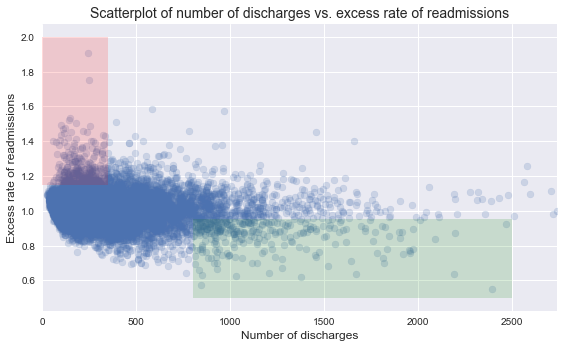

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

### Question 1:  Do you agree with the above analysis and recommendations?  Why or why not?



In [5]:
#Preliminary analysis
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [6]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [7]:
# NaN values in 'Excess Readmission Ratio' column
recleaned_hospital_read_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]
recleaned_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [8]:
recleaned_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


#### Question 1 Response: 



I do not agree with the above analysis nor its conclusions because all of the conclusions provided were largely unsubstantiated.  I don't doubt that a correlation exists between hospital capacity (number of discharges) and readmission rates, however the analysis above did not specify the direction nor the strength of the correlation.  Based on the chart provided, my suspicion is that the correlation may be negative.  Additionally, a review of the data shows that the cleaning efforts were not thorough as several records exists with missing data which could have affected the outcome of the analysis.  Lastly, there is a lack of consistency regarding the definition of "small capacity," with one part of the analysis definiting it as hospitals with < 100 discharges and another part defining it as hospitals with < 300 discharges; this lack of consistency in definitions could also impact the analysis and the conclusion. 

If more data was provided with this analysis, I would be more open to its conclusions and potentially support them.


### Question 2: Provide support for your arguments and your own recommendations with a statistically sound analysis.

1. Setup an appropriate hypothesis test.  
2. Compute and report the observed significance value (or p-value).  
3. Report statistical significance for  αα  = .01.  
4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?  
5. Look at the scatterplot above.  
    * What are the advantages and disadvantages of using this plot to convey information?  
    * Construct another plot that conveys the same information in a more direct manner.


#### Question 2 Response:  

The preliminary analysis concluded that a correlation exists between hospital capacity and the readmission ratio.  A hypothesis test will be conducted to assess whether this is true or not, the strength of the correlation will also be measured.

##### 1. Setup an appropriate hypothesis test. 

$H_{0}$:  A significant correlation does not exist between hospital capacity and readmission ratio.  
$H_{a}$:  A significant correlation does exists between hospital capacity and readmission ratio.

${\alpha}$ = 0.05  
**CI** = 0.95

#### 2. Compute and report the observed significance value (or p-value).  

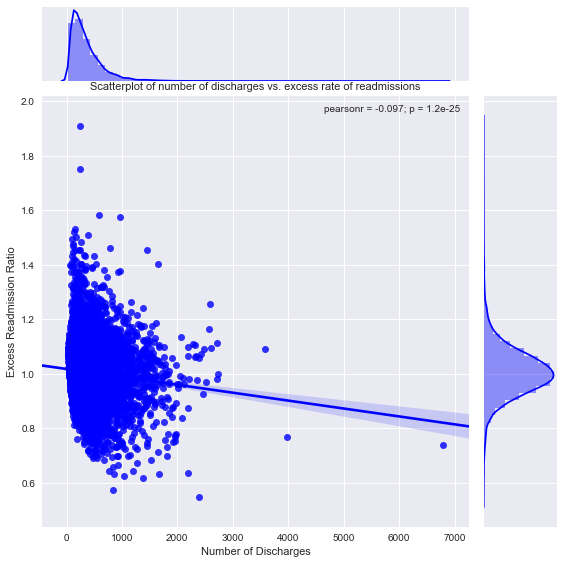

In [54]:
# scatterplot, correlation coefficient, p-value

sns.set(style="darkgrid", color_codes=True)
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=recleaned_hospital_read_df,
             kind='reg', color='blue', size=8)
sns.plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=11)
#sns.plt.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .20, interpolate=True)
#sns.plt.fill_between([800,2500], .5, .95, facecolor='green', alpha = .20, interpolate=True)

plt.show()

#### 3. Report statistical significance for  ${\alpha}$  = 0.01  

${\alpha}$ = 0.01  
**CI** = 0.99

The p-value of 1.2e-25, displayed in the above plot, is less than 0.01 which is statistically significant and provides strong evidence to reject the null hypothesis $(H_{0})$.

#### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The new analysis demonstrates that there is indeed a significant negative correlation (p < 0.01) between hospital discharges and the readmission ratio, however the correlation is very weak (pearsoncorr = 0.097) to provide any practical significance. Therefore, I do not recommend that hospitals/facilties with small capacity (< 300) be required to demonstrate upgraded resource allocation for quality care to continue operation provide nor directives and incentives for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.


##### 5. Look at the scatterplot above.  What are the advantages and disadvantages of using this plot to convey information?  Construct another plot that conveys the same information in a more direct manner.

The scatterplot of the preliminary analysis does a good job of identifying the significant good/bad areas related to discharges vs readmision ratios; hospital management and admistrators can use this to gauge hopital performance and make more data-driven decisions.  However, it did not illustrate the correlation between hospital capacity and readmission ratio.  

The plot created in question 2 does better job of illustrating the strength of the correlation as well as showing that the correlation between hospital capacity and readmission ratio is indeed slightly negative.
